## Lab Assignment 2 - GG3209
### Student ID - 220005413
####https://github.com/tabs-14/Lab_Assignment_2


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install contextily

In [ ]:
pip install mapclassify

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

####**Part 6**

**Task 1:  Data Exploration: Load the Chicago parcels dataset using Pandas**

In [17]:
chicago_geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Assignment_2_data')

**Task 2: Display the first few rows of the dataset. Investigate the available attributes and their data
types.**

In [18]:
chicago_geo.head(4) #head(4) to just show the first 4 rows of the data

POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   

                                            geometry  
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...

**Task 3: Create a map to visualize the spatial distribution of tax parcel polygons in Chicago.**

In [ ]:
pip install lonboard #lonboard library needed due to large amount of records in dataset

In [ ]:
from sklearn.cluster import KMeans, DBSCAN #for later clustering
from lonboard import Map,  SolidPolygonLayer #to plot the gdf

In [ ]:
chicago_geo = chicago_geo.to_crs(epsg=4326) #ensuring the espg is right for the gdf to be mapped

In [19]:
#Mapping chicago_geo using SolidPolygonLayer and Map
gdf = gpd.GeoDataFrame(chicago_geo)
layer = SolidPolygonLayer.from_geopandas(gdf,
    get_fill_color=[255, 0, 0])
Map(layer)

/usr/local/lib/python3.10/dist-packages/lonboard/_geoarrow/ops/reproject.py:107: UserWarning: Input being reprojected to EPSG:4326 CRS.
Lonboard is only able to render data in EPSG:4326 projection.
  warnings.warn(


Map(custom_attribution='', layers=(SolidPolygonLayer(get_fill_color=[255, 0, 0], table=arro3.core.Table
------…

**Task 4: Correlation Analysis. Explore correlations between spatial attributes (latitude, longitude)
and numerical attributes.**

In [20]:
chicago_geo = chicago_geo.set_geometry('geometry') #ensure that geometry column is named

#Add latitude and longitude columns, calculated using geometry
chicago_geo[['latitude', 'longitude']] = chicago_geo.geometry.centroid.get_coordinates(ignore_index=True)
chicago_geo.head(4)

POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   

                                            geometry      latitude  \
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  1.091780e+06   
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  1.092427e+06   
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  1.091688e+06   
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...  1.091538e+06   

      longitude  
0  1.943042e+06  
1  1.943134e+06  
2  1.942695e+06  
3  1.942343e+06

In [26]:
#pearson's correlation for all attributes
chicago_geo.corr(numeric_only=True) #pearson is the default for .corr

POLY_ID        ID      AREA   PIN_OLD       PIN  latitude  \
POLY_ID    1.000000  0.281011 -0.007202  0.099622  0.099810  0.592573   
ID         0.281011  1.000000  0.007726 -0.479761 -0.449598  0.705091   
AREA      -0.007202  0.007726  1.000000 -0.012953 -0.013246  0.005312   
PIN_OLD    0.099622 -0.479761 -0.012953  1.000000  0.982657 -0.337835   
PIN        0.099810 -0.449598 -0.013246  0.982657  1.000000 -0.346813   
latitude   0.592573  0.705091  0.005312 -0.337835 -0.346813  1.000000   
longitude -0.156919 -0.949257 -0.010339  0.478436  0.485506 -0.612231   

           longitude  
POLY_ID    -0.156919  
ID         -0.949257  
AREA       -0.010339  
PIN_OLD     0.478436  
PIN         0.485506  
latitude   -0.612231  
longitude   1.000000

The only attributes with data that relate to the location are Area, latitude and longitude as the other attributes identify the polygons. There are no clear correlations between the Area, latitude and longitude attributes, however it would be interesting to carry this out again with a different dataset that included crime reports for example.

**Tasks 5 & 6: K-Means Clustering.  Implement K-Means clustering with different values of n_clusters.Visualize the clustering results for each value of n_clusters, using multiple lonboard maps, and customized colour ramps.**

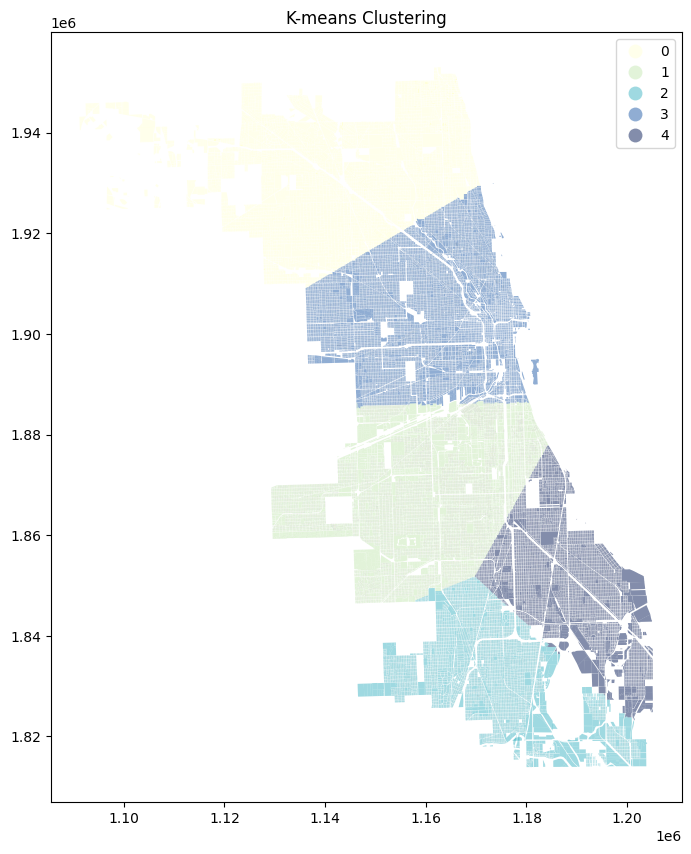

In [33]:
# K-means clustering with n_clusters = 5
kmeans = KMeans(n_clusters=5, random_state=42)
chicago_geo['kmeans_cluster'] = kmeans.fit_predict(chicago_geo[['longitude', 'latitude']])

fig, ax = plt.subplots(figsize=(10, 10))

chicago_geo.plot(ax=ax, column='kmeans_cluster', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='YlGnBu')
ax.set_title('K-means Clustering')

plt.show()


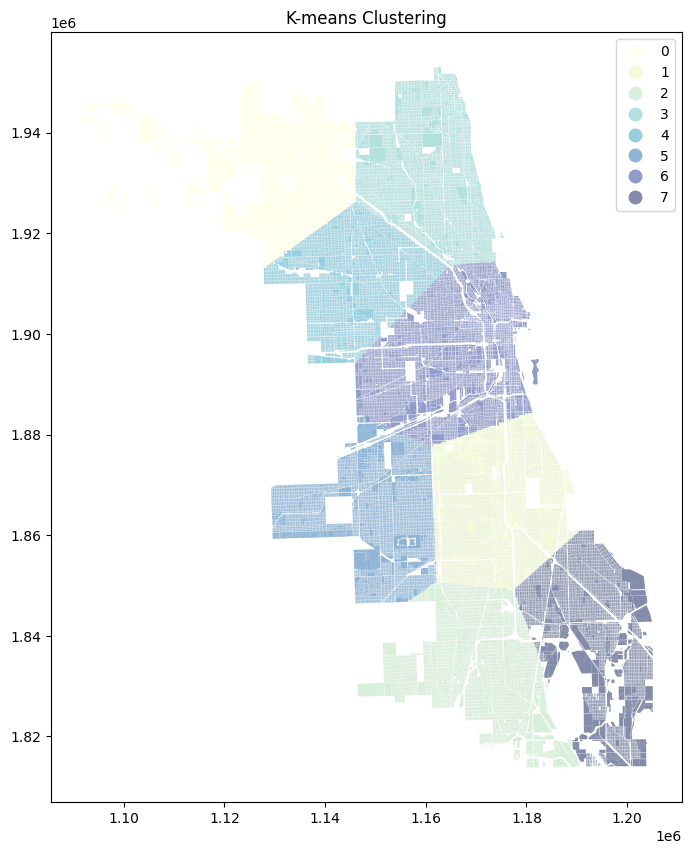

In [32]:
# K-means clustering with n_clusters = 8
kmeans = KMeans(n_clusters=8, random_state=42)
chicago_geo['kmeans_cluster'] = kmeans.fit_predict(chicago_geo[['longitude', 'latitude']])

fig, ax = plt.subplots(figsize=(10, 10))

chicago_geo.plot(ax=ax, column='kmeans_cluster', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='YlGnBu')
ax.set_title('K-means Clustering')

plt.show()

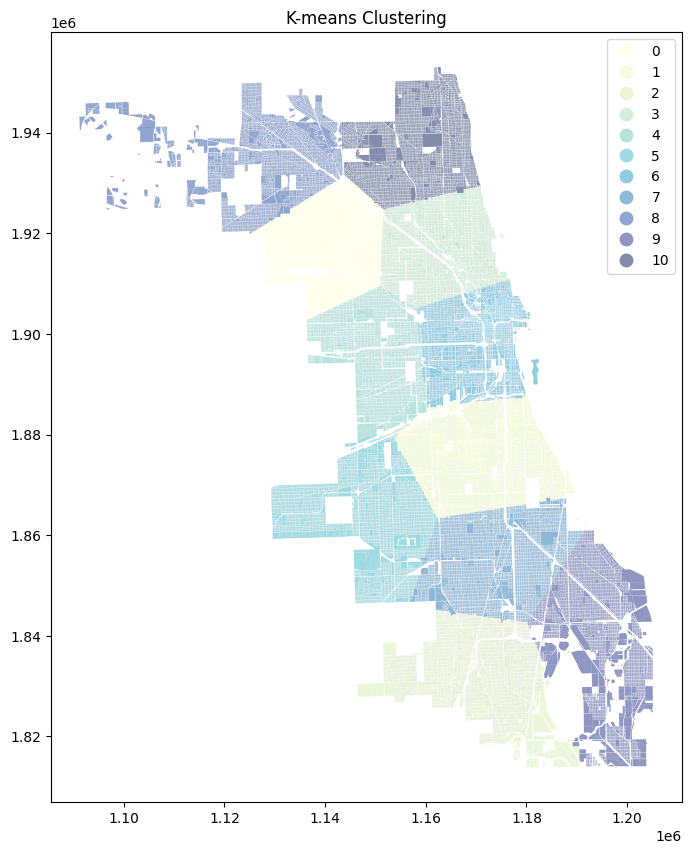

In [34]:
# K-means clustering with n_clusters = 11
kmeans = KMeans(n_clusters=11, random_state=42)
chicago_geo['kmeans_cluster'] = kmeans.fit_predict(chicago_geo[['longitude', 'latitude']])

fig, ax = plt.subplots(figsize=(10, 10))

chicago_geo.plot(ax=ax, column='kmeans_cluster', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='YlGnBu')
ax.set_title('K-means Clustering')

plt.show()

**Task 7: Evaluate the clustering results and choose an “optimal” value for n_clusters. Justify your choice in a markdown cell.**

By trying different values for n_clusters, I chose 8 as the optimal value as it fits the Chicago geodataset the best. Fewer clusters, such as 5, could be less accurate in such a large area and too many, such as 11, may include noise as well as the patterns in the data.

**Tasks 8 & 9:  DBSCAN Clustering: Implement the DBSCAN method. Experiment with different values of eps and min_samples in DBSCAN ( at least three).  Plot the clustering results for each combination of parameters. Therefore, you should create a plot matrix 3*3 ( min_samples and eps).**

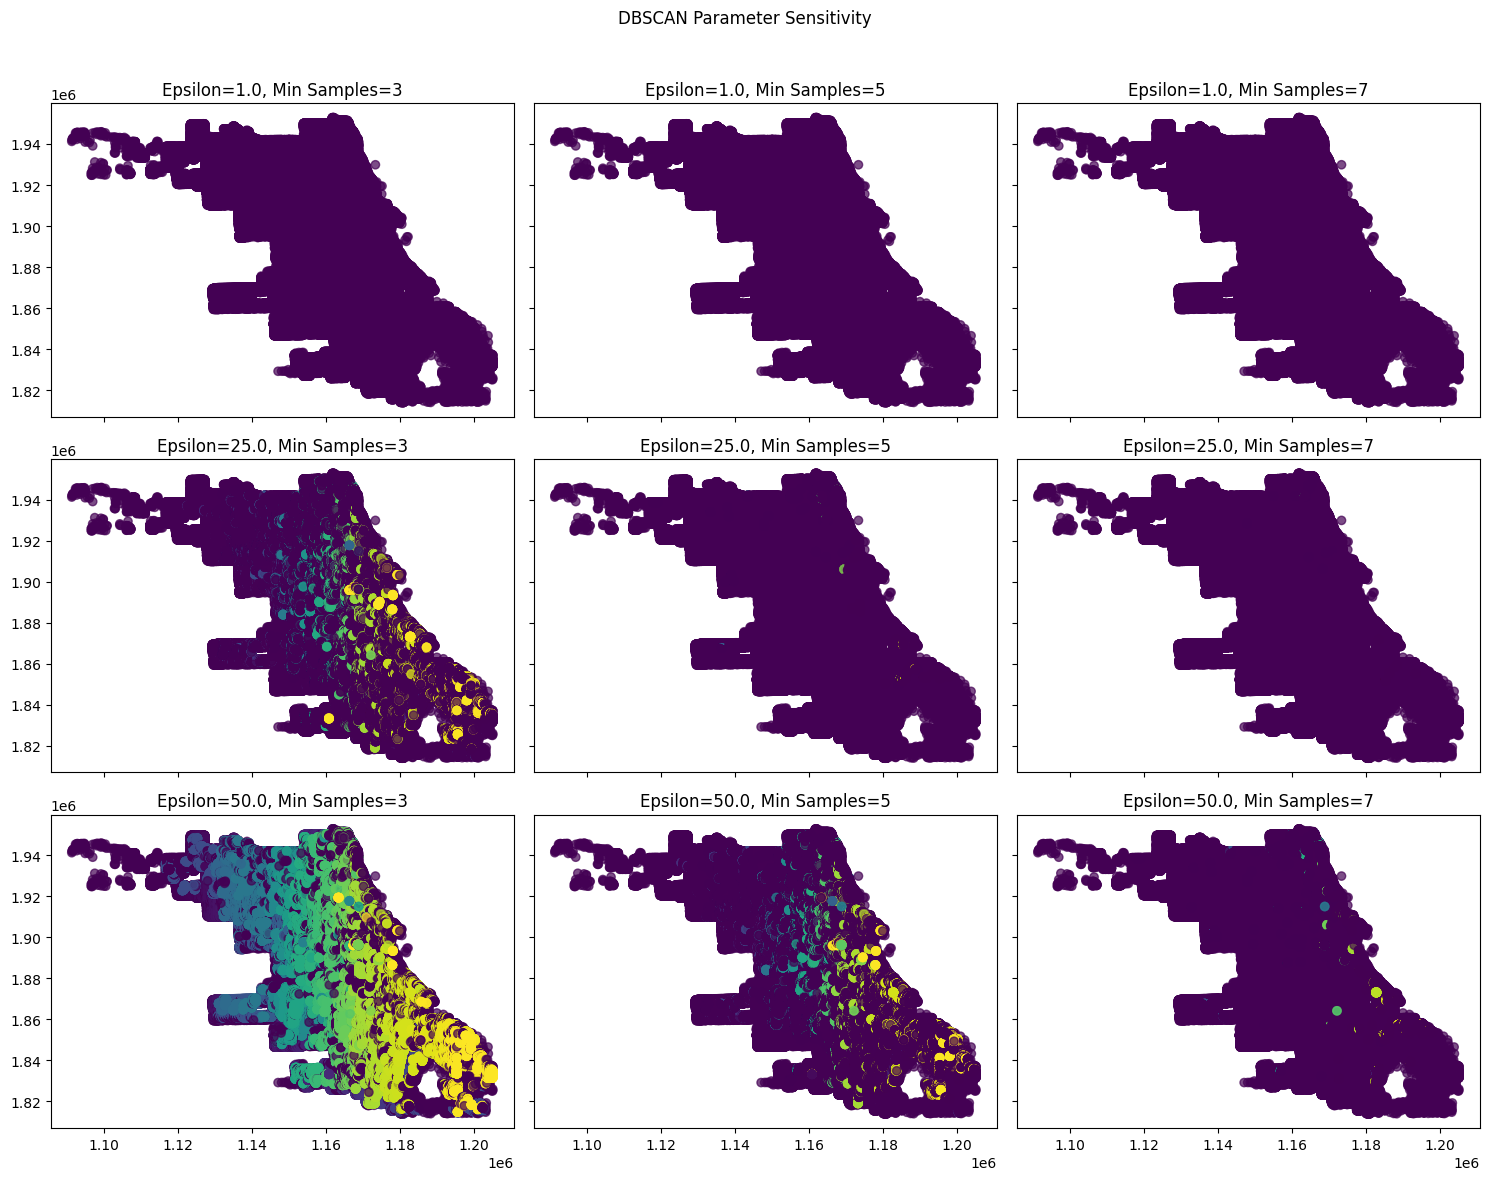

In [ ]:
#Function to visualize parameters
def visualize_dbscan_parameters(data, epsilon_values, min_samples_values):
    fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 12), sharex=True, sharey=True)
    fig.suptitle('DBSCAN Parameter Sensitivity')

    for i, epsilon in enumerate(epsilon_values):
        for j, min_samples in enumerate(min_samples_values):
          dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
          data['clusters_result'] = dbscan.fit_predict(data[['latitude', 'longitude']])
          axes[i, j].scatter(data['latitude'], data['longitude'], c=data['clusters_result'], cmap='viridis', alpha=0.7)
          axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

#Different eps and min sample values I chose:
epsilon_values = [1.0, 25.0, 50.0]
min_samples_values = [3, 5, 7]

# Run your function to visualize DBSCAN parameters
visualize_dbscan_parameters(chicago_geo, epsilon_values, min_samples_values)

**Task 10: Using a text cell write your insights about the impact of modifying the eps and min_samples parameters, and finally recommend suitable values for eps and min_samples based on your analysis.**

By testing different values for epsilon and minimum samples, I found that a greater value for eps combined with a medium value for minimum samples was the most effective for the Chicago Parcels dataset, as shown in the matrix above. A greater search distance (eps) reflects the fact that this is a large dataset which covers an entire city and points that are further from each other are still part of the same cluster. Therefore we are able to visualise these clusters effectively, a factor needed when analysing data for urban planning, for example. The number of min samples also had a large effect on the DBSCAN, when min samples = 7, there were too few clusters to idendify in the figure, however when it was = 3, there were too many overlapping clusters to pick out the key areas, which could result in losing key patterns when analysing datasets. Out of the values in the matrix above, the most effective is eps = 50 and min_samples = 5 as it is a good medium between the other values for min_samples.